# Heart Disease Prediction using Logistic Regression

_"Leveraging data science to detect heart disease before it strikes."_

---

## Author Information
- **Name**: Usama Manzoor  
- **Email**: [itsusama.official@gmail.com](mailto:itsusama.official@gmail.com)  
- **GitHub**: [https://github.com/iammalik884](https://github.com/iammalik884)  
- **LinkedIn**: [https://www.linkedin.com/in/usama-ai-marketing](https://www.linkedin.com/in/usama-ai-marketing/)

---

## Project Title
**Build a model to predict whether a patient has heart disease or not using the Logistic Regression Algorithm**

---

## Project Objective
The primary objective of this project is to develop a **binary classification model** using **Logistic Regression** that can accurately predict the presence of heart disease based on several medical features such as chest pain type, cholesterol, resting ECG, and more.

---

## Why This Project?
Heart disease is one of the leading causes of death worldwide. Early detection through machine learning can:
- Assist doctors with early diagnosis
- Reduce treatment costs and save lives
- Promote preventive healthcare using data-driven insights

---

## Technologies Used
- Python  
- Pandas, NumPy  
- Matplotlib, Seaborn  
- Scikit-Learn (Logistic Regression)  

---

_"Data is the new stethoscope — a simple model can offer life-saving insights."_


1) **Problem Statement**:

Build a model to predict whether a patient is diabetic or not using the Logistic Regression Algorithm


**2) Import Main Libraries**





In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
# 3) Domain Analysis

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# Heart Disease Dataset - Column Wise Comments for Domain Understanding

# 1)age: Age of the patient (in years)
# - Older patients are generally at higher risk of heart disease
# - Continuous numerical feature

# 2)sex: Gender of the patient (0 = Female, 1 = Male)
# - Categorical feature
# - Used to compare risk between males and females

# 3)cp: Chest Pain Type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic)
# - Most important indicator of heart issues
# - Categorical feature showing type of chest discomfort

# 4)trestbps: Resting Blood Pressure (in mm Hg)
# - High BP is a major risk factor for heart problems
# - Continuous numerical feature

# 5)chol: Serum Cholesterol level (in mg/dl)
# - High cholesterol can block arteries, leading to heart disease
# - Continuous numerical feature

# 5)fbs: Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False)
# - Binary feature
# - High sugar levels can lead to diabetes and heart issues

# 6)restecg: Resting Electrocardiographic results (0, 1, 2)
# - Measures heart's electrical signals
# - Shows any abnormalities in heart rhythm

# 7)thalach: Maximum Heart Rate Achieved during exercise
# - Low max heart rate could signal poor heart health
# - Continuous numerical feature

# 8)exang: Exercise Induced Angina (1 = Yes, 0 = No)
# - If chest pain occurs during exercise, it signals heart problems
# - Binary feature

# 9)oldpeak: ST depression induced by exercise relative to rest
# - Shows abnormality in heart activity during stress
# - Higher values = more stress on the heart

# 10)slope: Slope of the peak exercise ST segment (0 = downsloping, 1 = flat, 2 = upsloping)
# - Tells how ST segment behaves during exercise
# - Downsloping is more concerning

# 11)ca: Number of major vessels (0–3) colored by fluoroscopy
# - More vessels blocked means more severe heart issue
# - Categorical feature

# 12)thal: Thalassemia (1 = fixed defect, 2 = normal, 3 = reversible defect)
# - A blood disorder type that affects oxygen in blood
# - Reversible/fixed defects are bad indicators

# 13)target: Target variable (0 = No Heart Disease, 1 = Heart Disease)
# - This is what we want to predict
# - Binary classification problem


In [9]:
#4) Basic Checks

In [11]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [12]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
df.isnull().max()

,0
age,False
sex,False
cp,False
trestbps,False
chol,False
fbs,False
restecg,False
thalach,False
exang,False
oldpeak,False


In [24]:
df['age'].nunique()

41

In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
# 5 EDA(Exploratory Data Analysis)

In [27]:
# 1. Univariant Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


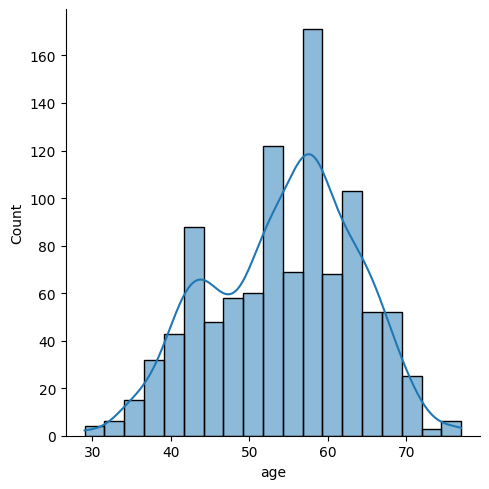

In [38]:
sns.displot( df.age,  kde=True, ax=ax)
plt.show()

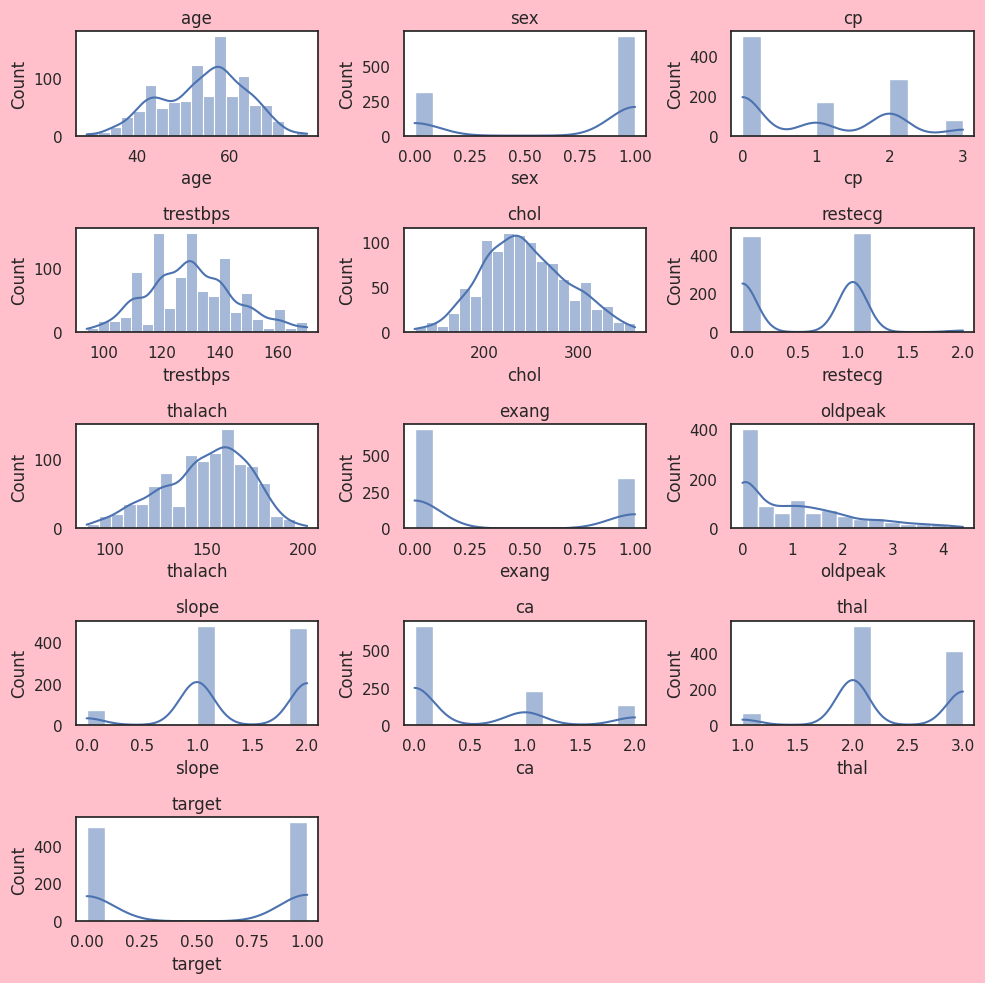

In [103]:
plt.figure(figsize=(10,10), facecolor='pink')
plot = 1
for i in df.columns:
    if plot < 14:
        ax = plt.subplot(5, 3, plot)
        sns.histplot(df[i], kde=True)   # Using histplot with KDE for distribution
        plt.title(i)
        plot += 1

plt.tight_layout()
plt.show()




In [40]:
# 2 Bivariant Plot

/tmp/ipython-input-108-2456998845.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=df, palette='Set2')
/tmp/ipython-input-108-2456998845.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=df, palette='Set2')
/tmp/ipython-input-108-2456998845.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=df, palette='Set2')
/tmp/ipython-input-108-2456998845.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

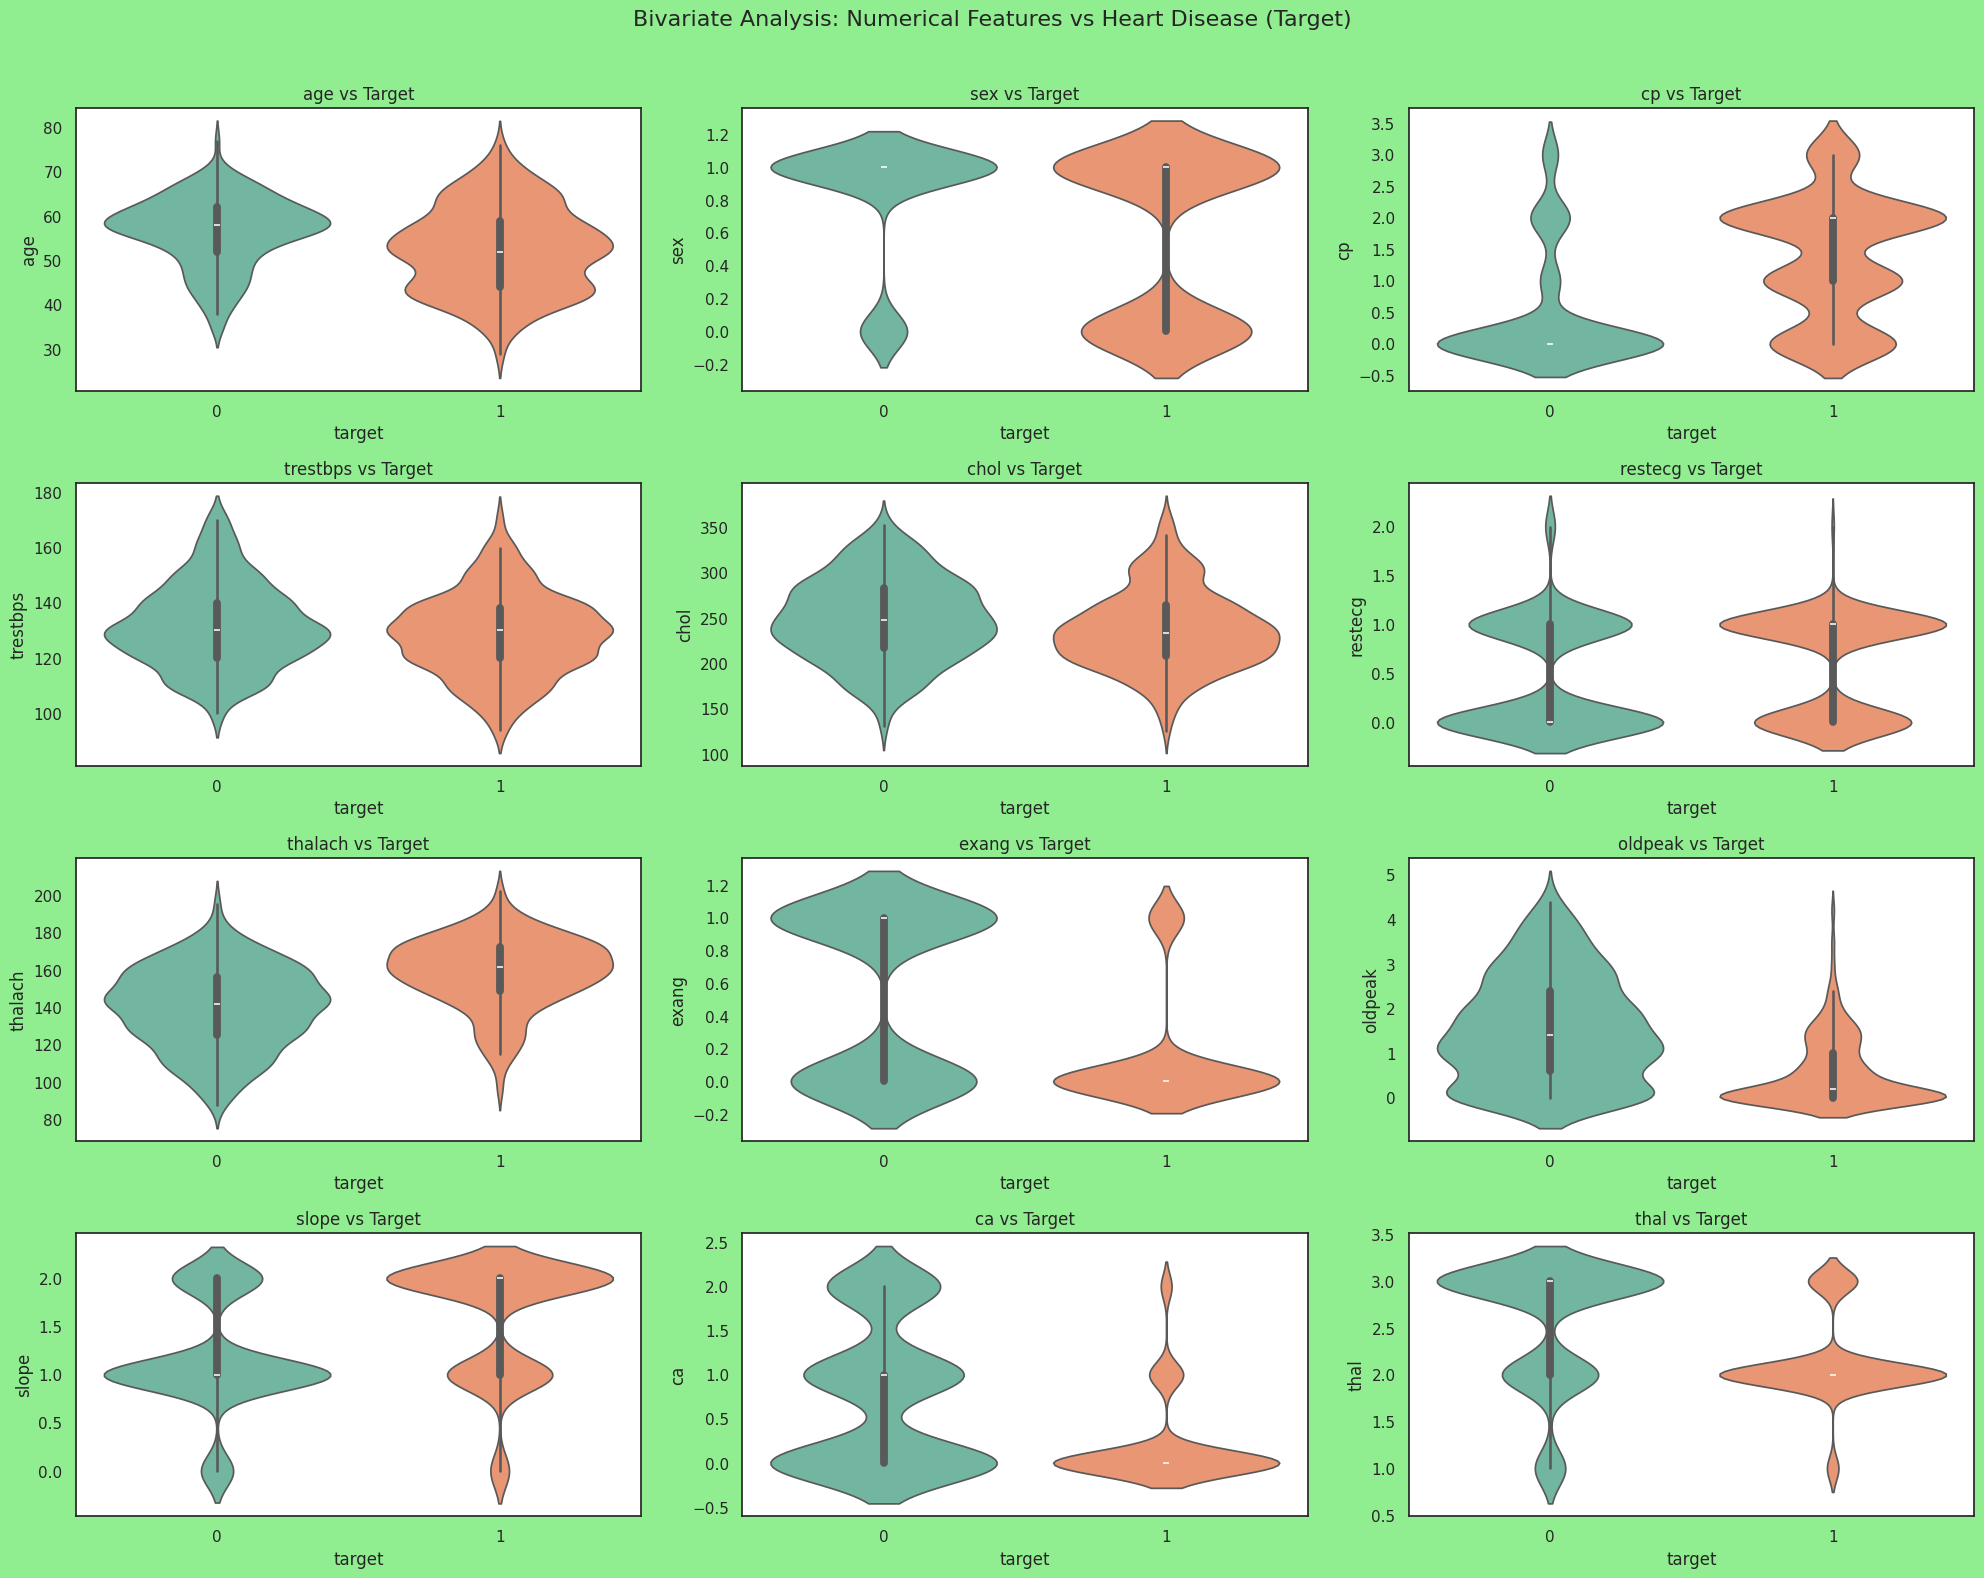

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(20, 20), facecolor='lightgreen')  # Better color and size
plot = 1

# Loop over all columns except 'target'
for col in df.columns:
    if col != 'target' and pd.api.types.is_numeric_dtype(df[col]):
        if plot <= 15:
            ax = plt.subplot(5, 3, plot)
            sns.violinplot(x='target', y=col, data=df, palette='Set2')
            plt.title(f'{col} vs Target', fontsize=12)
            plot += 1

plt.suptitle('Bivariate Analysis: Numerical Features vs Heart Disease (Target)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


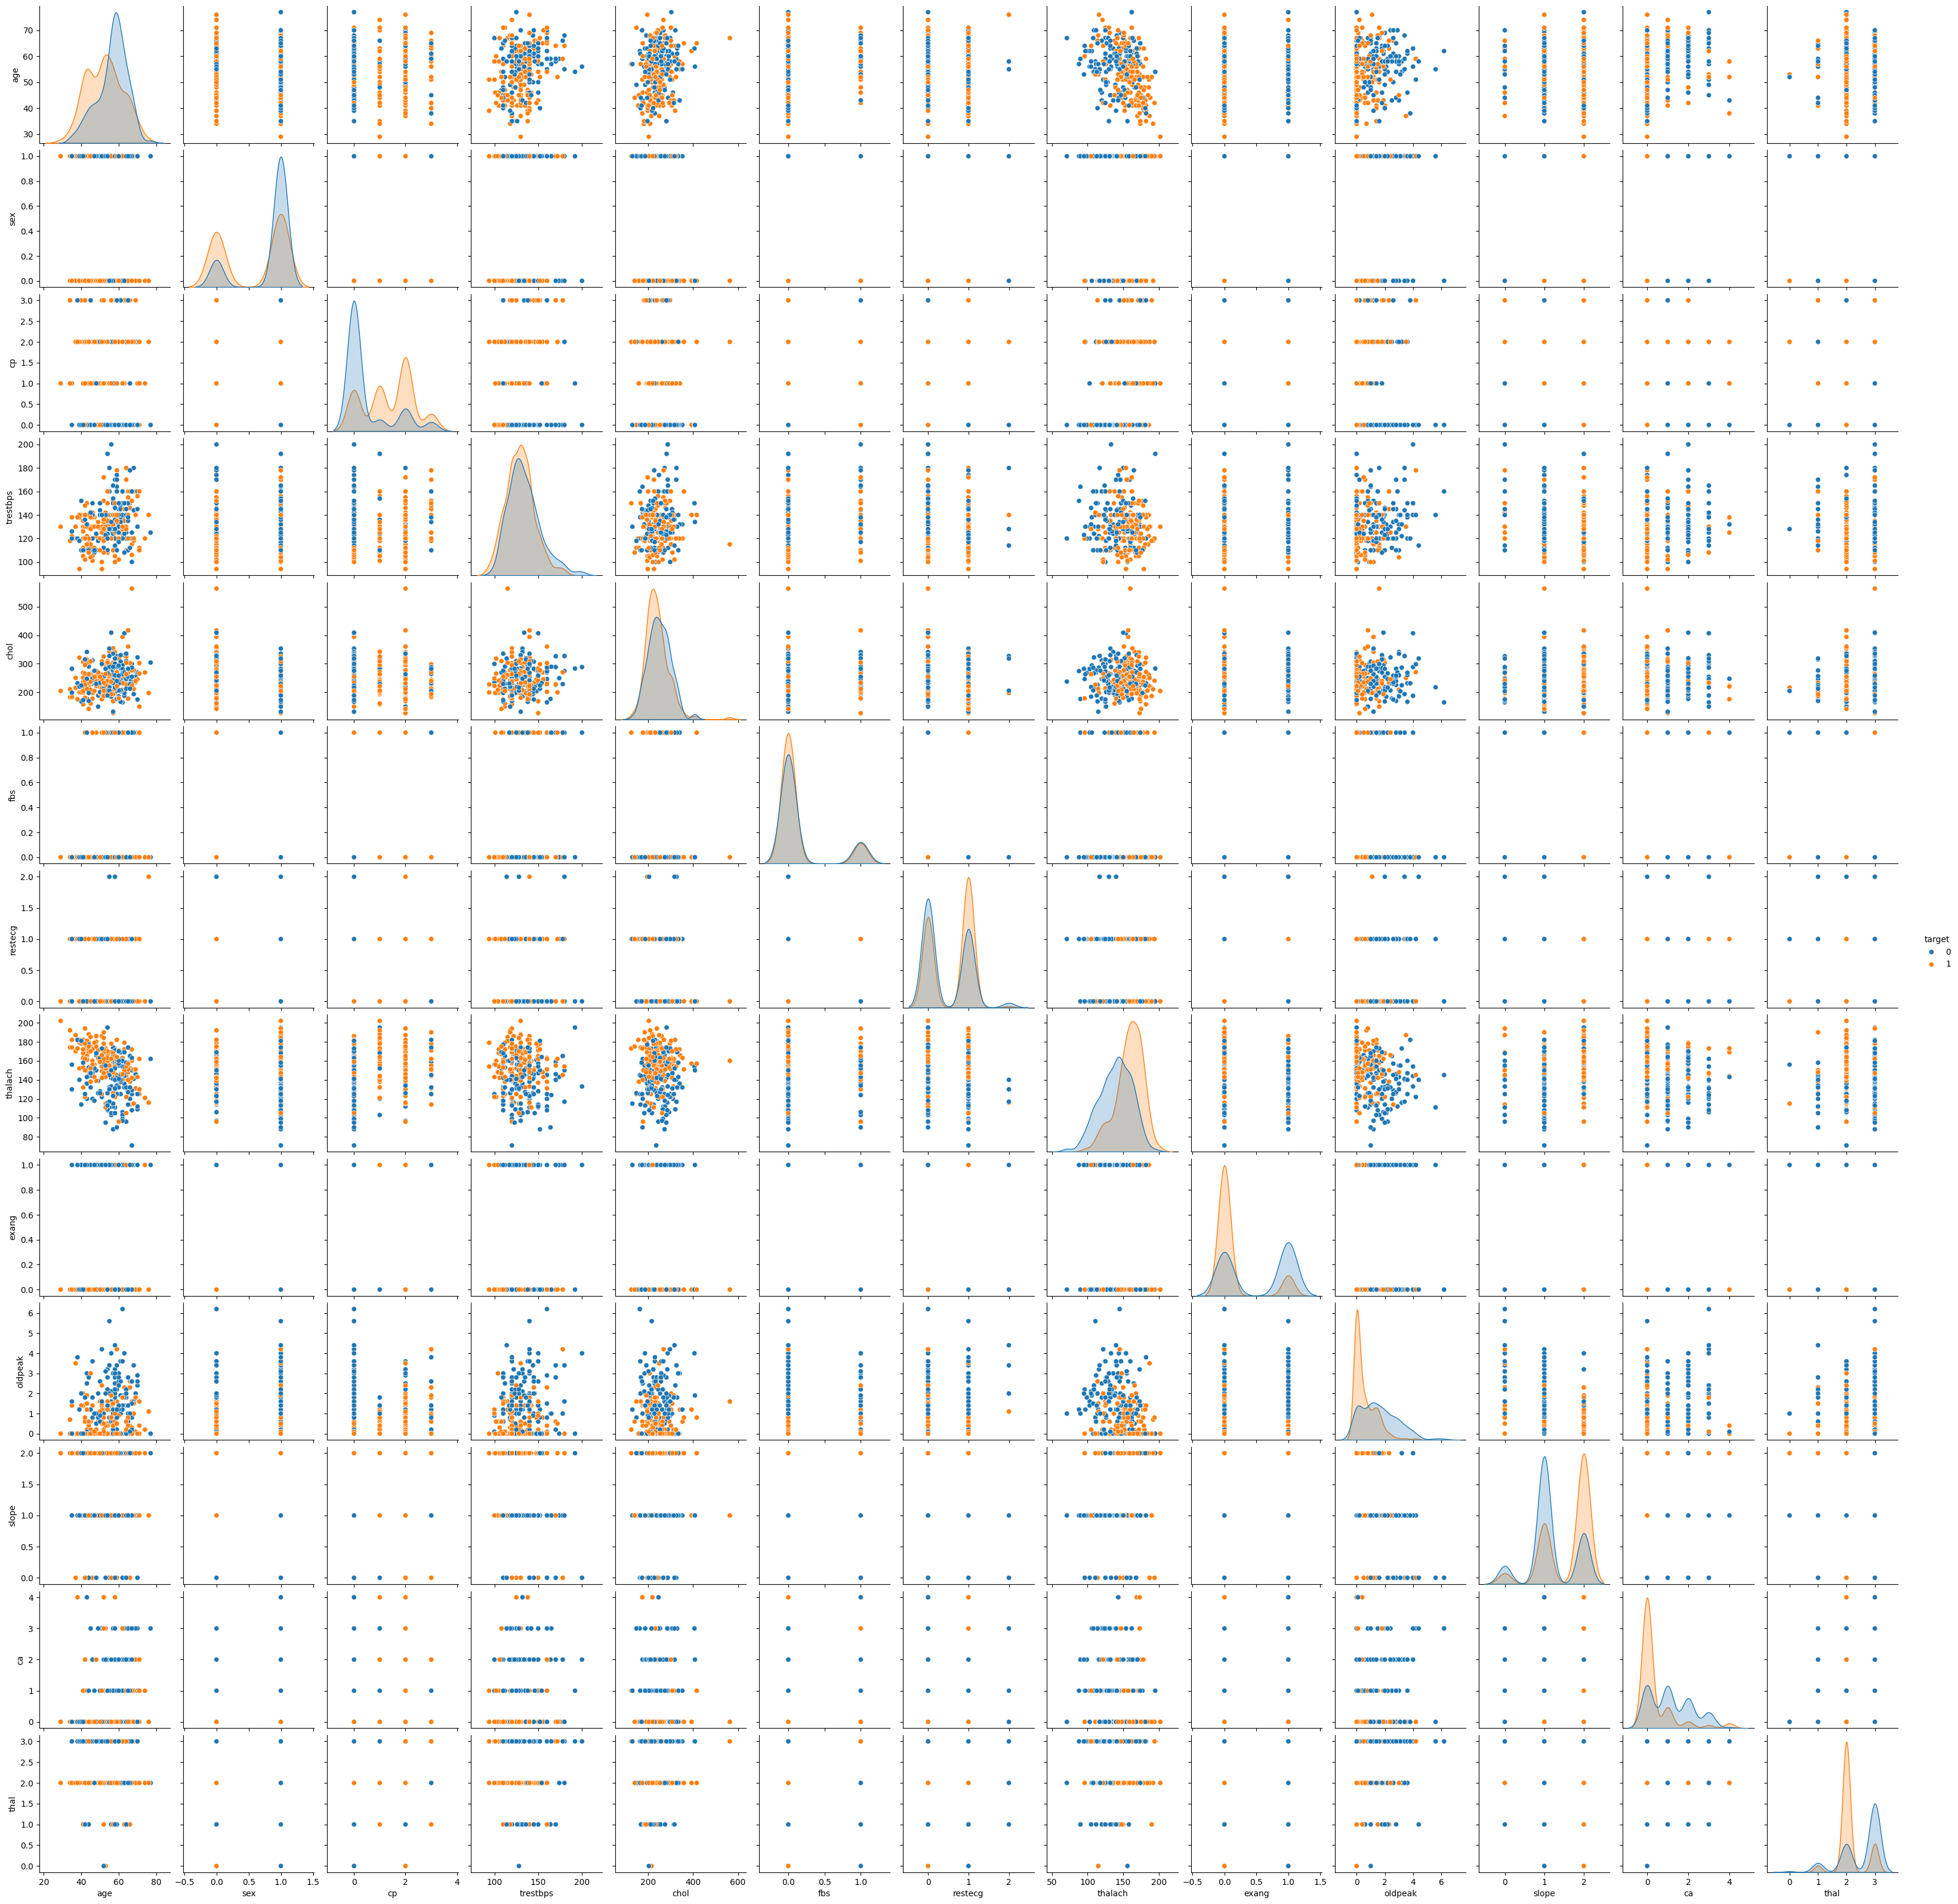

In [50]:
sns.pairplot(df, hue='target')

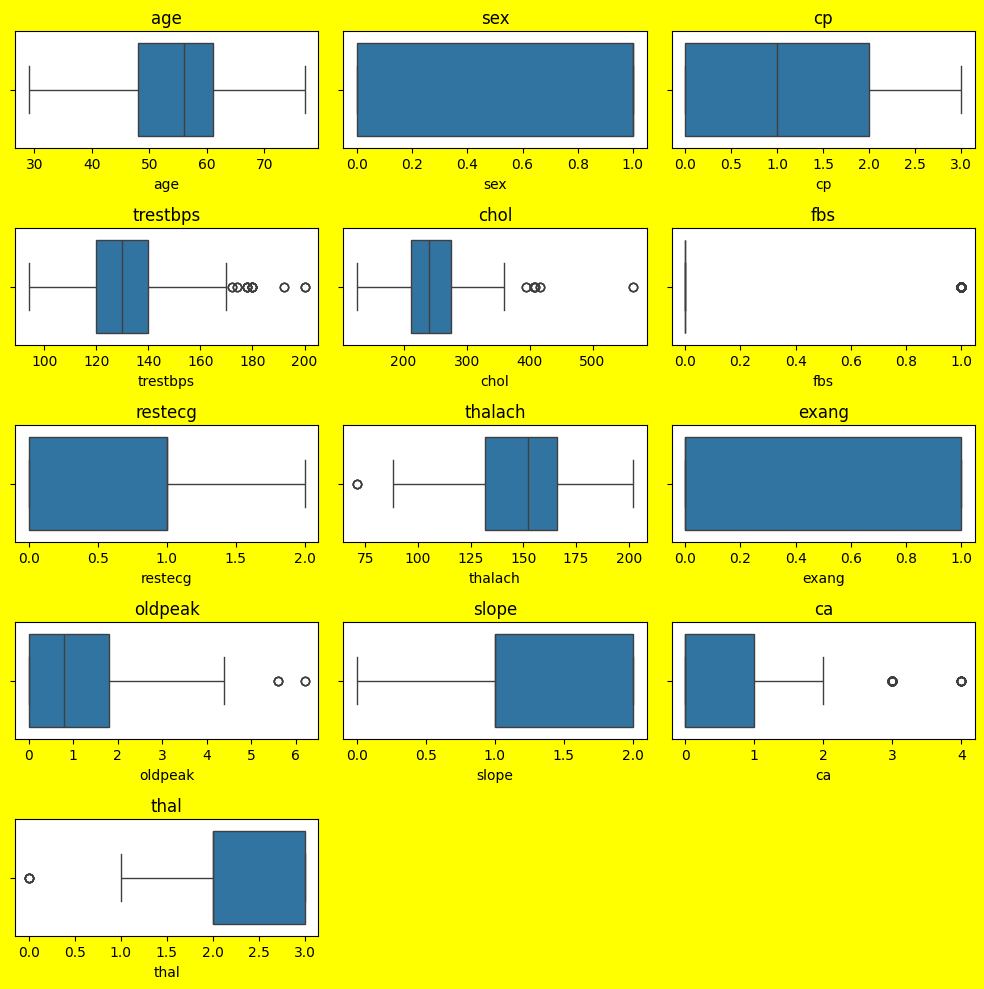

In [52]:
plt.figure(figsize=(10,10), facecolor='yellow')
plot=1
for i in df.columns:
    if plot < 14:
        ax = plt.subplot(5,3,plot)
        sns.boxplot(df[i], orient='h')
        plt.title(i)
        plot += 1
plt.tight_layout()
plt.show()

In [57]:
print(type(df))


<class 'float'>


In [61]:


df = pd.read_csv('heart.csv')

all_columns = [col for col in df.columns if col != 'target']


for col in all_columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # Ensure only numeric columns are processed
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df[col].median()

        df.loc[df[col] < lower_bound, col] = median_value
        df.loc[df[col] > upper_bound, col] = median_value


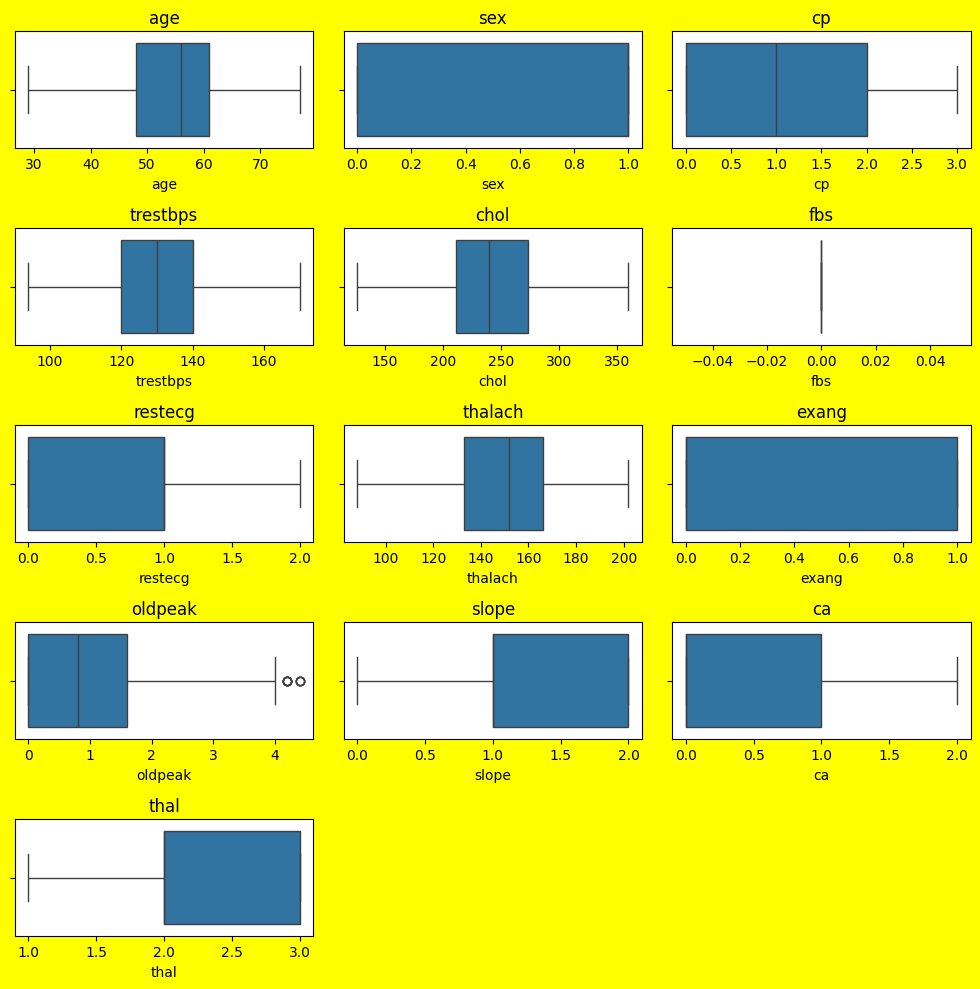

In [60]:
plt.figure(figsize=(10,10), facecolor='yellow')
plot=1
for i in df.columns:
    if plot < 14:
        ax = plt.subplot(5,3,plot)
        sns.boxplot(df[i], orient='h')
        plt.title(i)
        plot += 1
plt.tight_layout()
plt.show()

In [63]:
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.263789,0.185316,NaN,-0.132696,-0.379854,0.088163,0.208174,-0.169105,0.315804,0.070857,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.024302,-0.124257,NaN,-0.055117,-0.041213,0.139157,0.100392,-0.026666,0.033715,0.202273,-0.279501
cp,-0.071966,-0.041119,1.000000,0.063142,-0.094522,NaN,0.043581,0.301129,-0.401513,-0.157055,0.131633,-0.190363,-0.173567,0.434854
trestbps,0.263789,-0.024302,0.063142,1.000000,0.089919,NaN,-0.164869,-0.061022,-0.008203,0.119740,-0.080762,0.024019,0.006345,-0.111764
chol,0.185316,-0.124257,-0.094522,0.089919,1.000000,NaN,-0.100552,-0.048727,0.102425,0.058819,0.007514,0.077717,0.061832,-0.129869
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.132696,-0.055117,0.043581,-0.164869,-0.100552,NaN,1.000000,0.062080,-0.065606,-0.053998,0.086086,-0.094917,-0.019720,0.134468
thalach,-0.379854,-0.041213,0.301129,-0.061022,-0.048727,NaN,0.062080,1.000000,-0.399191,-0.349481,0.395768,-0.172634,-0.124513,0.418337
exang,0.088163,0.139157,-0.401513,-0.008203,0.102425,NaN,-0.065606,-0.399191,1.000000,0.316689,-0.267335,0.192694,0.218730,-0.438029
oldpeak,0.208174,0.100392,-0.157055,0.119740,0.058819,NaN,-0.053998,-0.349481,0.316689,1.000000,-0.541079,0.235973,0.180778,-0.433799


In [71]:
df.drop(['fbs'], axis=1, inplace=True)

In [73]:
df


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,106,0,1.9,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,159,0,0.0,2,0,2,1


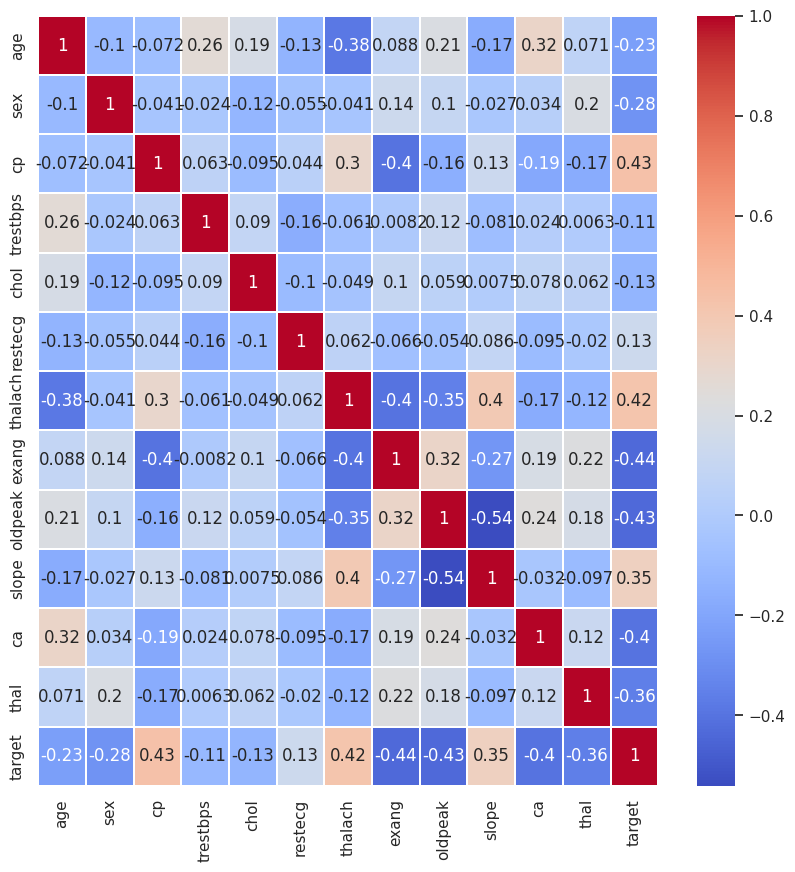

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths= .01, annot=True, cmap='coolwarm')
plt.show()

In [79]:
# 7) Creating Model

In [83]:
x = df.drop('target',axis=1)
y = df[['target']]

In [84]:
# Split the Data Into Train Test

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=4)

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

In [87]:
x_train

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.480824,0.670117,1.045714,0.017852,0.712362,-1.040647,0.026404,1.410080,0.525313,-0.627014,-0.663359,1.123791
1,-0.247226,0.670117,-0.917876,-0.117227,-0.849934,0.853232,0.289754,1.410080,-0.022468,-0.627014,-0.663359,-0.585261
2,1.048811,0.670117,2.027510,-1.332943,-0.693705,-1.040647,-0.236947,1.410080,0.707907,-0.627014,-0.663359,-0.585261
3,1.048811,0.670117,1.045714,-0.319846,1.493509,0.853232,-0.807539,1.410080,0.707907,-0.627014,-0.663359,1.123791
4,1.048811,0.670117,-0.917876,1.030948,-0.671386,-1.040647,-0.763647,-0.709179,0.890500,-0.627014,2.206837,-2.294314
...,...,...,...,...,...,...,...,...,...,...,...,...
763,-0.679238,0.670117,-0.917876,-0.522466,-0.448201,-1.040647,1.606505,-0.709179,-0.935435,0.994355,-0.663359,-0.585261
764,-0.247226,0.670117,0.063919,0.288011,-0.916890,0.853232,0.377537,-0.709179,-0.205061,0.994355,0.771739,-0.585261
765,-1.003248,0.670117,2.027510,-1.332943,0.489176,0.853232,-0.763647,-0.709179,0.160126,-0.627014,-0.663359,1.123791
766,0.400793,0.670117,0.063919,-0.657545,0.935547,-1.040647,0.465321,-0.709179,0.707907,-0.627014,-0.663359,-0.585261


In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [89]:
y_predict = model.predict(x_test)

In [91]:
y_test.value_counts()

,count
target,
0,132
1,125


In [95]:
y_predict

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, classification_report

In [97]:
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[107  25]
 [ 14 111]]
0.8482490272373541
0.8161764705882353
0.888
0.8505747126436781
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       132
           1       0.82      0.89      0.85       125

    accuracy                           0.85       257
   macro avg       0.85      0.85      0.85       257
weighted avg       0.85      0.85      0.85       257



In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

In [101]:
false_positive , true_positive, threshold = roc_curve(y_test, y_predict)
auc_score = roc_auc_score(y_test, y_predict)
auc_score

np.float64(0.8493030303030302)